<a href="https://colab.research.google.com/github/AnalyAq/Agromet/blob/Balance-h%C3%ADdrico/Copia_de_c%C3%B3digos_de_Agro_BN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy openpyxl

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
import statistics as st
import matplotlib.dates as mdates
from numpy import sin, cos, pi,arccos,sin,arcsin,tan
from datetime import datetime
import seaborn as sns #para graficar
import glob as glb
from matplotlib.dates import DateFormatter



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
excel_file_path = '/content/drive/MyDrive/2024 - 2/DatosA/dataT.xlsx'
df = pd.read_excel(excel_file_path)


In [ ]:
#VARIABLES
df['TIEMPO'] = pd.to_datetime(df['TIEMPO'], format='%d-%m-%y')
tiempo = df['TIEMPO']
TMAX = df['TMAX']
TMIN = df['TMIN']
TM = df['TM']
bc = df['bc']
bo = df['bo']
df['Lat'] = -(12.08)
lat = df['Lat']
lat= np.deg2rad (lat)
lat

dia = np.arange(251,346) #Días desde el 7 de septiembre al 31 de octubre
teta=(2*dia*3.1416)/365 #radianes

b1=3999.12
b2=702.57
b3=67.58
b4=9.08
declinacion = (0.00692 - b1*np.cos(teta)+b2*np.sin(teta)-b3*np.cos(2*teta)+b4*np.sin(2*teta))*10**-4 #radianes

C1 = 0.033523
C2 = 0.00128
C3 = 0.000739
C4 = 0.000099
distancia=1.00011+C1*np.cos(np.radians(teta))+C2*np.sin(np.radians(teta))+C3*np.cos(np.radians(2*teta))+C4*np.sin(np.radians(2*teta))

H = np.arccos(-np.tan(np.radians(lat))*np.tan(declinacion)) #radianes

#en MJ/m2.día
Qsv=458.37*0.0358*(distancia)*((H*np.sin(lat)*np.sin(declinacion))+(np.cos(lat)*np.cos(declinacion)*np.sin(H)))
df["Qsv"]= Qsv
df

,TIEMPO,TMAX,TMIN,TM,bc,bo,Tbs1,Tbs2,Tbs3,Ri1,Rr1,Ri2,Rr2,Ri3,Rr3,Lat,Qsv
0,2024-09-07,22.0,12.3,17.15,418,223,14.0,20.8,15.4,2.9,0.5,9.4,2.6,4.1,1.6,-12.08,16.007225
1,2024-09-08,23.2,11.7,17.45,418,223,13.2,22.3,15.4,8.6,2.4,10.0,2.6,5.2,1.6,-12.08,16.054398
2,2024-09-09,22.2,12.5,17.35,418,223,14.8,20.4,15.2,3.8,1.0,9.5,2.4,3.4,1.2,-12.08,16.101062
3,2024-09-10,23.8,13.1,18.45,418,223,14.2,21.2,15.5,7.7,1.9,9.8,2.4,4.0,1.6,-12.08,16.147192
4,2024-09-11,22.4,14.0,18.20,418,223,14.6,22.0,15.1,8.2,1.9,9.8,2.3,1.8,0.5,-12.08,16.192765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2024-12-06,25.8,16.2,21.00,446,238,18.2,25.9,18.2,10.1,2.5,9.6,2.6,2.9,0.8,-12.08,17.462298
91,2024-12-07,26.0,15.9,20.95,446,238,18.1,24.8,21.0,3.9,1.3,4.6,1.6,2.6,0.7,-12.08,17.459978
92,2024-12-08,26.0,17.3,21.65,446,238,18.5,23.0,19.6,2.3,0.6,3.2,0.8,1.6,0.4,-12.08,17.457774
93,2024-12-09,26.6,15.8,21.20,446,238,17.8,25.8,18.4,5.4,1.3,6.0,1.5,1.5,0.5,-12.08,17.455698


In [ ]:
#Estimación de temperatura media del periodo diurno
N = 2*(np.degrees(H)/15)
T = (TMAX  + TMIN)/2
Tmd = T + (((TMAX  - TMIN)*(11 + (12-0.5*N)))/(12.56*(0.5*N))) * np.sin((3.1416*(11-(12-0.5*N)))/(11 + 12 - 0.5*N))
df['Tmd']=Tmd

In [ ]:
#Velocidad máxima de fotosíntesis (Pm)
Pm = -0.2 * (Tmd**2) + 13*Tmd-145
df['Pm'] = Pm

In [ ]:
#Parámetro indicador del grado de cobertura nubosa - COSTA CENTRAL
Qs=0.41*37.211*(distancia)*((H*np.sin(lat)*np.sin(declinacion))+(np.cos(lat)*np.cos(declinacion)*np.sin(H)))
#en MJ/ m2.día y se le multiplica por 0.41 para convertirlo a mm/día
df["Qs"]= Qs
df
VT = (TMAX - TMIN)
Qi=Qs*(0.060+0.640*(VT/N))
F=(Qsv-0.5*Qi)/(0.8*Qsv)
df['F'] = F
df
df['Qi'] = Qi
df

,TIEMPO,TMAX,TMIN,TM,bc,bo,Tbs1,Tbs2,Tbs3,Ri1,...,Rr2,Ri3,Rr3,Lat,Qsv,Tmd,Pm,Qs,F,Qi
0,2024-09-07,22.0,12.3,17.15,418,223,14.0,20.8,15.4,2.9,...,2.6,4.1,1.6,-12.08,16.007225,18.896298,29.237858,14.882368,0.914457,8.593772
1,2024-09-08,23.2,11.7,17.45,418,223,13.2,22.3,15.4,8.6,...,2.6,5.2,1.6,-12.08,16.054398,19.520344,32.555708,14.926226,0.858667,10.052184
2,2024-09-09,22.2,12.5,17.35,418,223,14.8,20.4,15.2,3.8,...,2.4,3.4,1.2,-12.08,16.101062,19.096283,30.318074,14.969611,0.914467,8.643905
3,2024-09-10,23.8,13.1,18.45,418,223,14.2,21.2,15.5,7.7,...,2.4,4.0,1.6,-12.08,16.147192,20.376304,36.853198,15.012500,0.883475,9.469350
4,2024-09-11,22.4,14.0,18.20,418,223,14.6,22.0,15.1,8.2,...,2.3,1.8,0.5,-12.08,16.192765,19.712232,33.544598,15.054870,0.954771,7.648921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2024-12-06,25.8,16.2,21.00,446,238,18.2,25.9,18.2,10.1,...,2.6,2.9,0.8,-12.08,17.462298,22.727731,47.150552,16.235190,0.917916,9.278310
91,2024-12-07,26.0,15.9,20.95,446,238,18.1,24.8,21.0,3.9,...,1.6,2.6,0.7,-12.08,17.459978,22.767715,47.306524,16.233033,0.902438,9.709488
92,2024-12-08,26.0,17.3,21.65,446,238,18.5,23.0,19.6,2.3,...,0.8,1.6,0.4,-12.08,17.457774,23.215752,49.010549,16.230984,0.945783,8.497520
93,2024-12-09,26.6,15.8,21.20,446,238,17.8,25.8,18.4,5.4,...,1.5,1.5,0.5,-12.08,17.455698,23.143690,48.741894,16.229054,0.880768,10.312310


In [ ]:
#Estimación de Velocidad máxima de producción de biomasa bruta (Pm>20)

bgm=(F*bo*(1+0.025*(Pm-20))+bc*((1-F)*(1+0.01*(Pm-20))))
df["bgm"]=bgm

In [ ]:
#Estimación de Biomasa Neta (Bn)
N1=np.arange(0,95)
bn=(0.36*bgm*N1)/(1+0.25*N1*(0.00108*(0.044+0.0019*(Tmd)+0.001*(Tmd**2))))
df["bn"]=bn
bn

,0
0,0.000000
1,114.495421
2,213.047995
3,363.747812
4,441.101841
...,...
90,13197.259904
91,13454.078929
92,13682.249771
93,14131.867025


In [ ]:
print(df)

# Guardar el DataFrame en un nuevo archivo Excel
df.to_excel('BIOMASAINTENTO 2.xlsx', index=False)

       TIEMPO  TMAX  TMIN     TM   bc   bo  Tbs1  Tbs2  Tbs3   Ri1  ...  Rr3  \
0  2024-09-07  22.0  12.3  17.15  418  223  14.0  20.8  15.4   2.9  ...  1.6   
1  2024-09-08  23.2  11.7  17.45  418  223  13.2  22.3  15.4   8.6  ...  1.6   
2  2024-09-09  22.2  12.5  17.35  418  223  14.8  20.4  15.2   3.8  ...  1.2   
3  2024-09-10  23.8  13.1  18.45  418  223  14.2  21.2  15.5   7.7  ...  1.6   
4  2024-09-11  22.4  14.0  18.20  418  223  14.6  22.0  15.1   8.2  ...  0.5   
..        ...   ...   ...    ...  ...  ...   ...   ...   ...   ...  ...  ...   
90 2024-12-06  25.8  16.2  21.00  446  238  18.2  25.9  18.2  10.1  ...  0.8   
91 2024-12-07  26.0  15.9  20.95  446  238  18.1  24.8  21.0   3.9  ...  0.7   
92 2024-12-08  26.0  17.3  21.65  446  238  18.5  23.0  19.6   2.3  ...  0.4   
93 2024-12-09  26.6  15.8  21.20  446  238  17.8  25.8  18.4   5.4  ...  0.5   
94 2024-12-10  26.8  16.8  21.80  446  238  18.2  26.2  19.2  10.1  ...  1.5   

      Lat        Qsv        Tmd        

#GRÁFICA DE BN CALCULADO


In [ ]:

#CÁLCULO DEL Bno
Bno=[2787.88, 1575.76, 3012.99, 3484.99, 4441.21, 8359.46, 11845.73, 10604.85]
fechas_muestras = ['2024-10-02', '2024-10-09', '2024-10-15', '2024-10-21', '2024-10-30', '2024-11-06', '2024-11-13', '2024-11-27']
fechas_muestras_dt = pd.to_datetime(fechas_muestras)
# Crear el DataFrame para las muestras ajustadas
df_muestras_ajustadas = pd.DataFrame({
    'TIEMPO': fechas_muestras_dt,
    'Muestras (Kg/ha.día)': Bno})

df_muestras_ajustadas

,TIEMPO,Muestras (Kg/ha.día)
0,2024-10-02,2787.88
1,2024-10-09,1575.76
2,2024-10-15,3012.99
3,2024-10-21,3484.99
4,2024-10-30,4441.21
5,2024-11-06,8359.46
6,2024-11-13,11845.73
7,2024-11-27,10604.85


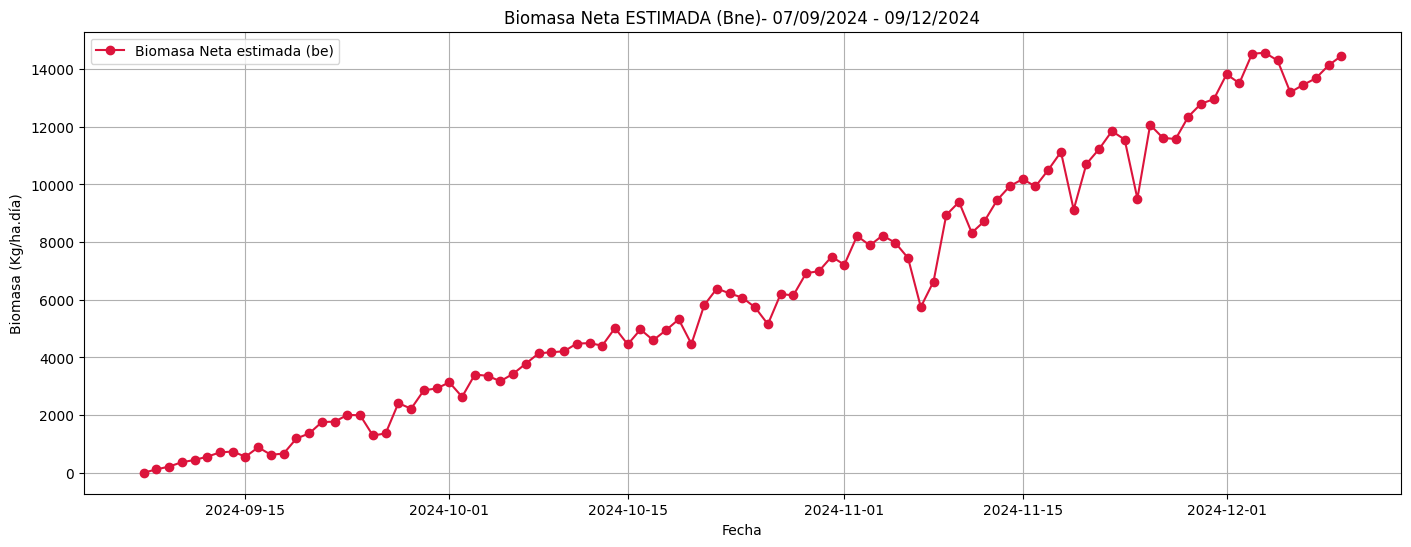

In [ ]:
# Graficar los datos
plt.figure(figsize=(17, 6))
plt.plot(df['TIEMPO'], df['bn'], marker='o', color='crimson', linestyle='-', label='Biomasa Neta estimada (be)')
plt.title('Biomasa Neta ESTIMADA (Bne)- 07/09/2024 - 09/12/2024')
plt.xlabel('Fecha')
plt.ylabel('Biomasa (Kg/ha.día)')
plt.legend()
plt.grid(True)

plt.show()

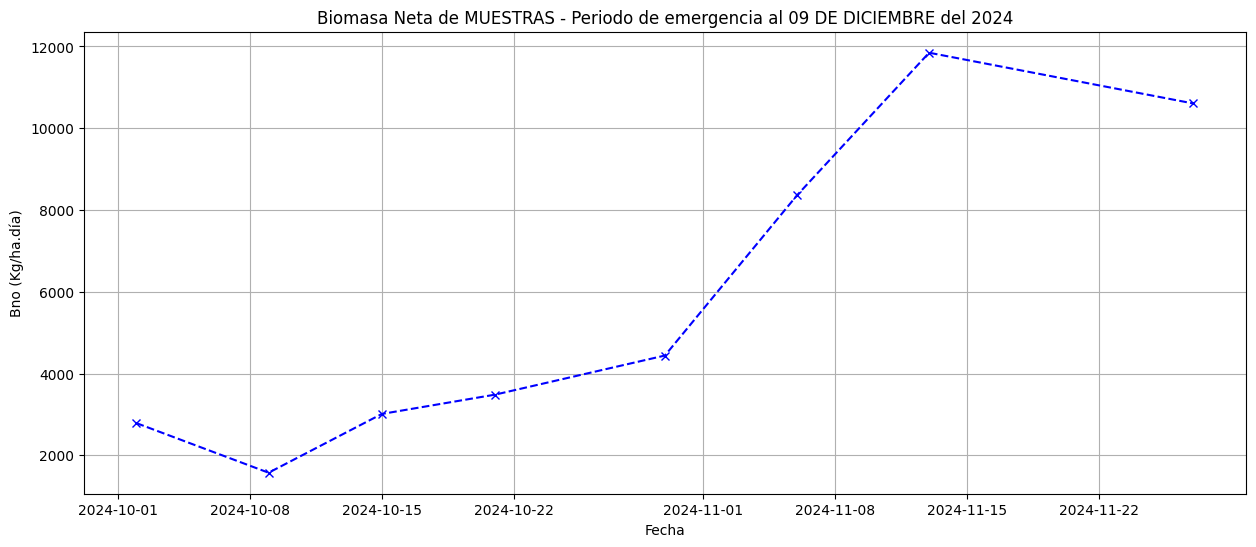

In [ ]:
#GRÁFICA DE BNo CALCULADO
dia1 = np.arange(1,56)
plt.figure(figsize=(15, 6))
plt.plot(df_muestras_ajustadas['TIEMPO'], df_muestras_ajustadas['Muestras (Kg/ha.día)'],
         marker='x', color='blue', linestyle='--', label='Biomasa  de Muestras')

plt.title('Biomasa Neta de MUESTRAS - Periodo de emergencia al 09 DE DICIEMBRE del 2024')
plt.ylabel('Bno (Kg/ha.día)')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

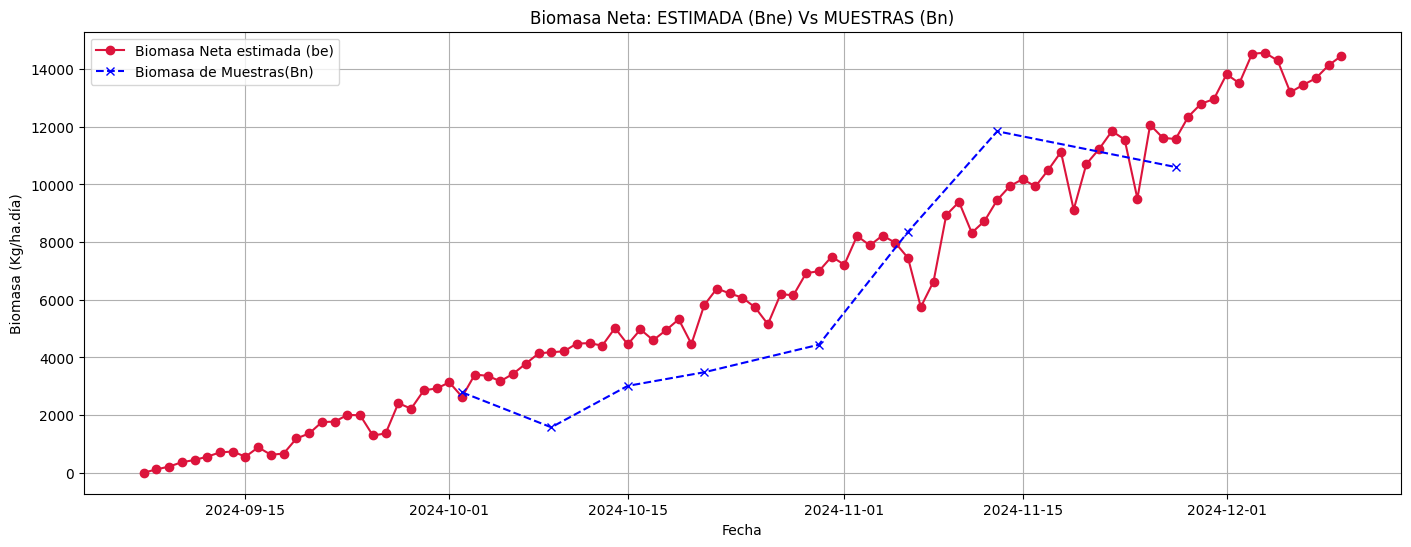

In [ ]:
# Graficar los datos
plt.figure(figsize=(17, 6))
plt.plot(df['TIEMPO'], df['bn'], marker='o', color='crimson', linestyle='-', label='Biomasa Neta estimada (be)')
plt.plot(df_muestras_ajustadas['TIEMPO'], df_muestras_ajustadas['Muestras (Kg/ha.día)'],
         marker='x', color='blue', linestyle='--', label='Biomasa de Muestras(Bn)')
plt.title('Biomasa Neta: ESTIMADA (Bne) Vs MUESTRAS (Bn)')
plt.xlabel('Fecha')
plt.ylabel('Biomasa (Kg/ha.día)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#####   QUINUA    ######
#muestras = [1.4, 4.26, 8.16, 15.3, 28.46]  # en gramos de extracción
#muestras = [0.46, 0.52, 1.46, 3.1, 5.76]  # en gramos secas
#####   QUINUA    ######
# Datos de muestras
muestras = [1.4, 4.26, 8.16, 15.3, 28.46]  # Biomasa en g
fechas_muestras = ['2024-10-02', '2024-10-09', '2024-10-15', '2024-10-21', '2024-10-30']
fechas_muestras_dt = pd.to_datetime(fechas_muestras)  # Convertir a tipo datetime

area_parcela_m2 = 3 * 5.6
numero_plantas = 46

# Convertir las muestras a kg y calcular el peso total de biomasa en la parcela
muestras_kg = [m / 1000 for m in muestras]
muestras_biomasa_total = [m * numero_plantas for m in muestras_kg]

# Convertir el área de la parcela de m2 a ha (1 ha = 10,000 m2)
area_parcela_ha = area_parcela_m2 / 10000

# Calcular el peso de la biomasa por ha
muestras_biomasa_kg_ha = [m / area_parcela_ha for m in muestras_biomasa_total]

# Crear el DataFrame para las muestras ajustadas
df_muestras_ajustadas = pd.DataFrame({
    'Fecha': fechas_muestras_dt,
    'Muestras Ajustadas (Kg/ha)': muestras_biomasa_kg_ha})



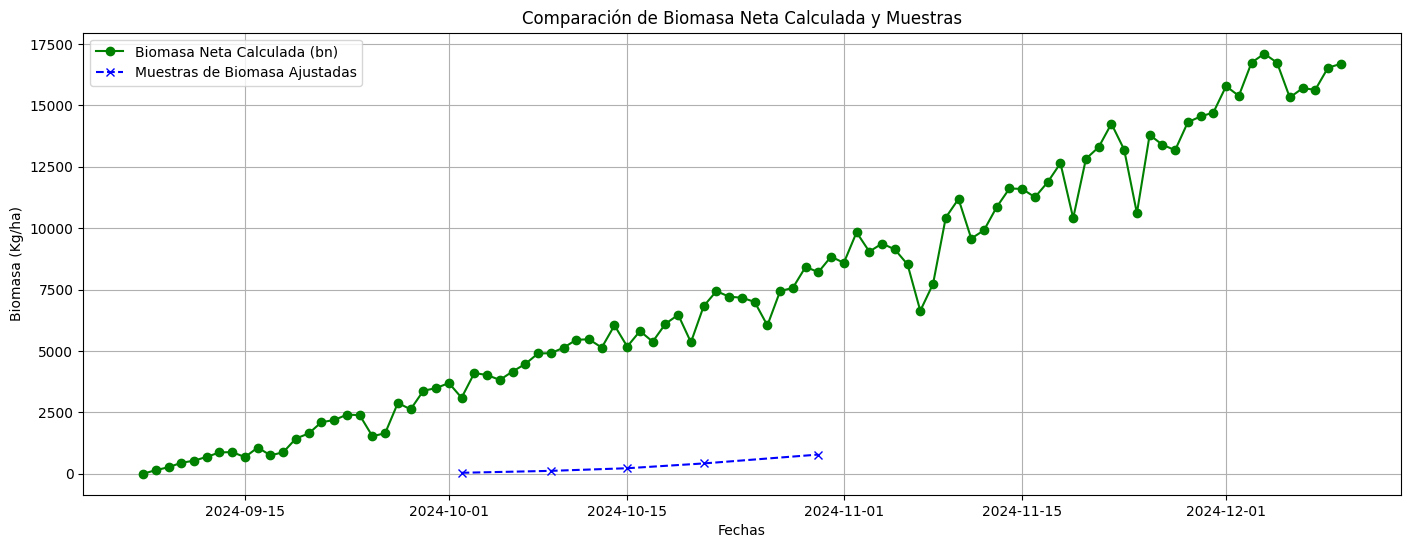

In [ ]:
# Graficar los datos
plt.figure(figsize=(17, 6))
plt.plot(df['TIEMPO'], df['bn'], marker='o', color='#008000', linestyle='-', label='Biomasa Neta Calculada (bn)')
plt.plot(df_muestras_ajustadas['Fecha'], df_muestras_ajustadas['Muestras Ajustadas (Kg/ha)'],
         marker='x', color='blue', linestyle='--', label='Muestras de Biomasa Ajustadas')
plt.title('Comparación de Biomasa Neta Calculada y Muestras')
plt.xlabel('Fechas')
plt.ylabel('Biomasa (Kg/ha)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
#####   QUINUA    ######
#muestras = [1.4, 4.26, 8.16, 15.3, 28.46]  # en gramos de extracción
#muestras = [0.46, 0.52, 1.46, 3.1, 5.76]  # en gramos secas
#####   QUINUA    ######

#muestras = [165.56, 217.86, 275.08, 378.32, 384.46, 341.41, 393.5]  # en gramos de extracción

#muestras = [21, 23.24, 29.5, 37.64, 48.35, 28.5, 40.6]  # en gramos secas
muestras =  [42, 46.44, 66, 75.28, 99.7, 70, 107.2] #extra
dias_muestras = [12, 19, 26, 33, 40, 47, 54]  # días desde el 20 de abril
area_parcela_m2 = 3 * 5.6
numero_plantas = 46

# Convertir las muestras a kg y calcular el peso total de biomasa en la parcela
muestras_kg = [m / 1000 for m in muestras]
muestras_biomasa_total = [m * numero_plantas for m in muestras_kg]

# Convertir el área de la parcela de m2 a ha (1 ha = 10,000 m2)
area_parcela_ha = area_parcela_m2 / 10000

# Calcular el peso de la biomasa por ha
muestras_biomasa_kg_ha = [m / area_parcela_ha for m in muestras_biomasa_total]

# Crear el DataFrame para las muestras ajustadas
df_muestras_ajustadas = pd.DataFrame({
    'Fecha': pd.to_datetime(fechas_muestras),
    'Muestras Ajustadas (Kg/ha)': muestras_biomasa_kg_ha
})

# Ejemplo de DataFrame con datos calculados (bn)
dias_totales = np.arange(1, 79)
df['Día'] = dias_totales


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
#####   QUINUA    ######
#muestras = [1.4, 4.26, 8.16, 15.3, 28.46]  # en gramos de extracción
#muestras = [0.46, 0.52, 1.46, 3.1, 5.76]  # en gramos secas
#####   QUINUA    ######

#muestras = [165.56, 217.86, 275.08, 378.32, 384.46, 341.41, 393.5]  # en gramos de extracción

#muestras = [21, 23.24, 29.5, 37.64, 48.35, 28.5, 40.6]  # en gramos secas
muestras =  [42, 46.44, 66, 75.28, 99.7, 70, 107.2] #extra
dias_muestras = [12, 19, 26, 33, 40, 47, 54]  # días desde el 20 de abril
area_parcela_m2 = 3 * 5.6
numero_plantas = 46

# Convertir las muestras a kg y calcular el peso total de biomasa en la parcela
muestras_kg = [m / 1000 for m in muestras]
muestras_biomasa_total = [m * numero_plantas for m in muestras_kg]

# Convertir el área de la parcela de m2 a ha (1 ha = 10,000 m2)
area_parcela_ha = area_parcela_m2 / 10000

# Calcular el peso de la biomasa por ha
muestras_biomasa_kg_ha = [m / area_parcela_ha for m in muestras_biomasa_total]

# Crear el DataFrame para las muestras ajustadas
df_muestras_ajustadas = pd.DataFrame({
    'Fecha': pd.to_datetime(fechas_muestras),
    'Muestras Ajustadas (Kg/ha)': muestras_biomasa_kg_ha
})

# Ejemplo de DataFrame con datos calculados (bn)
dias_totales = np.arange(1, 79)
df['Día'] = dias_totales

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.plot(df['Día'], df['bn'], marker='o', color='#008000', linestyle='-', label='Biomasa Neta Calculada (bn)')
plt.plot(df_muestras_ajustadas['Día'], df_muestras_ajustadas['Muestras Ajustadas (Kg/ha)'], marker='x', color='blue', linestyle='--', label='Muestras de Biomasa Ajustadas')

plt.title('Comparación de Biomasa Neta Calculada y Muestras')
plt.xlabel('Días desde el 20 de abril')
plt.ylabel('Biomasa (Kg/ha)')
plt.legend()
plt.grid(True)

plt.show()

print("Datos de Biomasa Neta Calculada (bn):")
print(df[['Día', 'bn']])  # Días 12 a 26
print("\nDatos de Muestras de Biomasa :")
print(df_muestras_ajustadas)
print(df["bn"])
